In [15]:
from pydataset import data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy import stats


In [16]:
df = data('tips')
df

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
240,29.03,5.92,Male,No,Sat,Dinner,3
241,27.18,2.00,Female,Yes,Sat,Dinner,2
242,22.67,2.00,Male,Yes,Sat,Dinner,2
243,17.82,1.75,Male,No,Sat,Dinner,2


## One Sample T-test example (compare a subroup to the population)
- business question - are tips on Sunday significantly different than the rest of the week?
- the Null Hypothesis = there is no difference (tips are the same on Sunday vs the entire wk)
- the Alternative Hypothesis = there IS a difference btwn Sunday tips and the entire wk

In [17]:
#Setup
null_hypothesis = "Sunday tips are the same as the rest of the week"
alternative_hypothesis = "Sunday tips are different than the rest of the week's"
confidence_level = .95
alpha = 1 - confidence_level

In [18]:
#Make a subgroup for Sunday
sunday = df[df.day == "Sun"]
sunday.head()

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4


<AxesSubplot:>

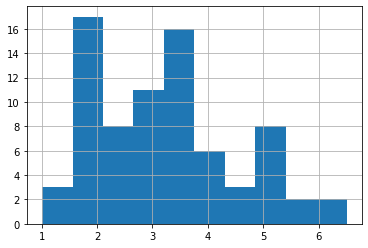

In [19]:
#Take a peek at the Sunday tips
sunday.tip.hist()

<AxesSubplot:>

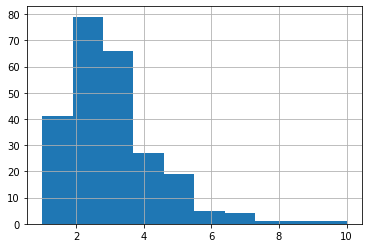

In [20]:
#compare to entire dataframe:
df.tip.hist()

In [25]:
#compare w/out just eyeballing the 2 histograms
#if you are doing a one-tailed test, use the ttest_1samp function (#1 samp)
t, p = stats.ttest_1samp(sunday.tip, df.tip.mean())
p

0.0737884052452269

In [26]:
alpha

0.050000000000000044

In [27]:
if p < alpha:
    print("We reject the null hypothesis that", null_hypothesis)
    print("We move forward with the alternateive hypothesis that", alternative_hypothesis)
else:
    print("We fail to reject the null hypothesis")
    print("Failing to reject the null != 'accepting the null'")

We fail to reject the null hypothesis
Failing to reject the null != 'accepting the null'


# T-tests compare means of continuous values between groups

<AxesSubplot:>

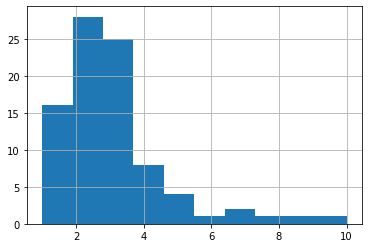

In [28]:
saturday=df[df.day == "Sat"]
saturday.tip.hist()

<AxesSubplot:>

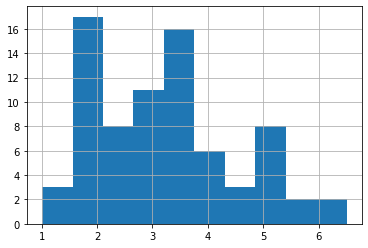

In [29]:
sunday=df[df.day == "Sun"]
sunday.tip.hist()

# Types of T-tests

## Samples
- **One Sample t-test** compares the mean of a subgroup to the mean of a population
- One sample ex: is Sunday tips vs the rest of the week

- **Two Sample t-test** compares the means of 2 subgroups
- Two sample ex: comparing average tips btwn smokers vs nonsmokers

## Two Tails checks for any difference between the means
- A **two-tailed t-test** is measuring for any difference, regardless of direction (means of one group: higher or lower) 
- The two-tailed t-test is checking if the means of two groups are different (measuring the means of 2 groups)
- If we have a two-tailed t-test, we can use the **p value**, as is and compare it to the alpha.
- means are different (either one is higher or lower, but two tailed means we're not focused on direction)
- the tailed-ness is not dependent on the sample

## One tailed checks for a greater than or less than difference between averages
- checks if one mean is greater than or less than the other
- meaning we can get direction here
- To test if the means are **higher**, we evaluate *(p/2) < a* and *t > 0* (to test if higher)
- For checking if **less-than**, we do *(p/2) < a* and  *t < 0* (to test if lower)

# Do you use one tailed or two tailed?
- depends on how you're forming your alternative hypothesis
- if your alternative hyp states "there is a diff btwn these groups" --> **two tailed**
- if your alternative hyp states "X group has higher/lower tips than Y" --> **one tailed**

In [30]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4


In [31]:
#business question: 
#do smokers have a larger total_bill than non-smokers?

#null hyp = total_bills are the same for both groups
#we're comparing 2 subgroups, so we will be doing 2-sample t-test (comparing smoker vs nonsmoker)
#one-tailed, since we're looking if one group is higher total_bill.mean than the other


#Setup:
null_hypothesis = "The means of total_bill are the same for smoker vs nonsmoker"
alternative_hypothesis = "Smokers have a higher total_bill than nonsmokers"
confidence_level = .95
a = 1-confidence_level #call your shot before you run your test

In [32]:
#compare the 2 populations visually

smokers = df[df.smoker == "Yes"]
non = df[df.smoker == "No"]

<AxesSubplot:>

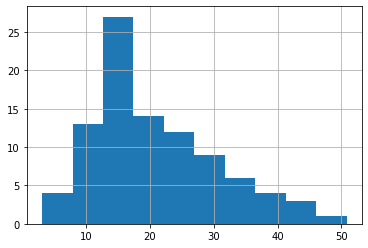

In [34]:
smokers.total_bill.hist()

<AxesSubplot:>

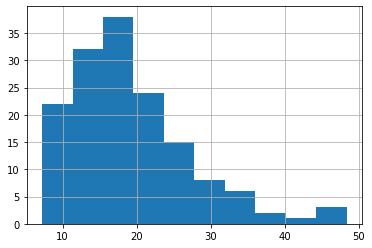

In [33]:
non.total_bill.hist()

In [35]:
#Two sample b/c we're comparing 2 subgroups to eachother
#single tail, b/c we're checking if smokers total_bill is higher

#.ttest_ind test of independence == 2 sample t-test function
t, p = stats.ttest_ind(smokers.total_bill, non.total_bill)

t, p

(1.3384363834700073, 0.1820103288430244)

In [36]:
# p/2 < a and t > 0 is how we compare means if higher
if (p/2) < a and t >0: #(p/2 cause 1 tail)
    print("reject the null hyp")
else:
    print("We fail to reject the null hyp")
    
#this means we don't have sufficient evidence to support the claim
#that smokers have higher bills than non-smokers

We fail to reject the null hyp


In [37]:
#same setup from above, but check if means are different, regardless of direction
null_hypothesis = "the mean total_bill of nonsmokers and smokers is the same"
alternative_hypothesis = "the mean total_bill of nonsmokers and smokers is different"

#still is 2 sample b/c 2 subgroups
#2 tailed b/c we're looking for any difference

In [39]:
t, p = stats.ttest_ind(smokers.total_bill, non.total_bill)

t, p

(1.3384363834700073, 0.1820103288430244)

In [40]:
#use only p < a if we have 2 tailed test b/c we're looking for mean(a) != mean(b)

if p <a: 
    print("we reject the null hyp that they are the same")
    print("we move forward w/ the alternative hyp")
else:
    print("we fail to reject the null hyp")

#we do not have sufficient evidenence to support the claim that smokers and nonsmokers have different bills

we fail to reject the null hyp


## Another Example:
## Diner host notices us working on stats in the booth all the time
they ask us:
- given this data, are tips different on weekends vs weekdays?
- we'll have to make a weekend group and a weekday group (to do)
- we're comparing 2 sub-groups, we have a 2-sample t-test
- if we're not concerned about direction, but only IF the means are different, then we'll go w/ 2-tailed


In [41]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4


In [42]:
def weekend(x):
    if x == "Sun" or x == "Sat":
        return 1
    else:
        return 0

In [43]:
df["is_weekend"] = df.day.apply(weekend)
df.head()

,total_bill,tip,sex,smoker,day,time,size,is_weekend
1,16.99,1.01,Female,No,Sun,Dinner,2,1
2,10.34,1.66,Male,No,Sun,Dinner,3,1
3,21.01,3.50,Male,No,Sun,Dinner,3,1
4,23.68,3.31,Male,No,Sun,Dinner,2,1
5,24.59,3.61,Female,No,Sun,Dinner,4,1


In [44]:
df["is_weekend"] = df.day.apply(weekend)
df.tail()

,total_bill,tip,sex,smoker,day,time,size,is_weekend
240,29.03,5.92,Male,No,Sat,Dinner,3,1
241,27.18,2.00,Female,Yes,Sat,Dinner,2,1
242,22.67,2.00,Male,Yes,Sat,Dinner,2,1
243,17.82,1.75,Male,No,Sat,Dinner,2,1
244,18.78,3.00,Female,No,Thur,Dinner,2,0


In [45]:
weekends = df[df.is_weekend == 1]
weekdays = df[df.is_weekend == 0]

<AxesSubplot:>

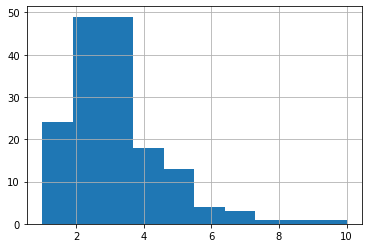

In [46]:
weekends.tip.hist()

<AxesSubplot:>

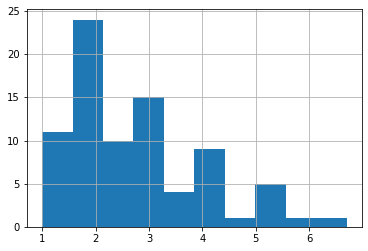

In [47]:
weekdays.tip.hist()

In [60]:
confidence_level = .95
a= 1-confidence_level

#ttest_ind for 2 sample t tests
t, p = stats.ttest_ind(weekdays.tip, weekends.tip)
t, p

(-1.8834950801996837, 0.06083244523772748)

In [61]:
if p < a:
    print("We reject the null hypothesis that weekend and weekday tips are the same")
else:
    print("We fail to reject the null hypothesis")
    print("Not enough evidence to support the claim that the tip levels are different")

We fail to reject the null hypothesis
Not enough evidence to support the claim that the tip levels are different


In [62]:
#if we set diff conf level
confidence_level = .90 
a= 1-confidence_level

#ttest_ind for 2 sample t tests
t, p = stats.ttest_ind(weekdays.tip, weekends.tip)
t, p

(-1.8834950801996837, 0.06083244523772748)

In [63]:
if p < a:
    print("We reject the null hypothesis that weekend and weekday tips are the same")
else:
    print("We fail to reject the null hypothesis")
    print("Not enough evidence to support the claim that the tip levels are different")

We reject the null hypothesis that weekend and weekday tips are the same


## So.. we don't have evidence to support the claim that the means are significantly different

In [54]:
#check if weekday tips are higher than weekend tips
#this means we're going from a 2-tailed (direction ambivalent) to a 1-tailed test
confidence_level = .95
a= 1-confidence_level


###PAY CLOSE ATTENTION###
# The direction of a one-tailed test here, and the t < 0 or t > 0 part
# comes down to the first arg into .ttest_ind
t, p = stats.ttest_ind(weekdays.tip, weekends.tip)
t, p

(-1.8834950801996837, 0.06083244523772748)

In [64]:
null = "there is no difference"
alternative = "Weekday tips are greater than weekend tips" #paying attention to order of args

In [66]:
#check one-tailed test
#t > 0 if we're testing if one mean is higher than the other
if (p/2) < a and t > 0:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")
    print("we don't have enough evidence to support the claim that", alternative)

We fail to reject the null hypothesis
we don't have enough evidence to support the claim that Weekday tips are greater than weekend tips


In [56]:
#compare
weekdays.tip.mean(), weekends.tip.mean()

(2.7628395061728392, 3.1152760736196328)

In [67]:
#let's make a new hypothesis
#check if weekend tips are greater than weekday tips
null = "there is no diff"
alternative = "Weekday tips are less than weekend tips"

if (p/2) < a and t < 0:
    print("We reject the null hypothesis that tip means are the same")
    print("We move foward with the understanding that weekday tips are lower than weekend tips")
else:
    print("We fail to reject the null hypothesis")
    print("There is insufficient evidence to support the claim")

We reject the null hypothesis that tip means are the same
We move foward with the understanding that weekday tips are lower than weekend tips
